In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:99%;}
div.CodeMirror {font-family:Consolas; font-size:20pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [23]:
df = pd.read_csv('data/일별평균대기오염도_2022(에어코리아).csv', encoding='cp949')
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0
1,20220101,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0
2,20220101,행주,0.034,0.012,0.7,0.004,27.0,16.0
3,20220101,항동,0.030,0.011,0.5,0.003,27.0,14.0
4,20220101,한강대로,0.037,0.011,0.6,0.003,34.0,14.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [24]:
# 측정일시 컬럼을 날짜형으로 변환
df['측정일시'] = df['측정일시'].astype(str)
df['측정일시'] = \
    df['측정일시'].str[:4] + '-' + df['측정일시'].str[4:6] + '-' + df['측정일시'].str[6:]

In [25]:
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,2022-01-01,강남구,0.029,0.014,0.5,0.003,25.0,12.0
1,2022-01-01,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0
2,2022-01-01,행주,0.034,0.012,0.7,0.004,27.0,16.0
3,2022-01-01,항동,0.030,0.011,0.5,0.003,27.0,14.0
4,2022-01-01,한강대로,0.037,0.011,0.6,0.003,34.0,14.0


In [28]:
df['측정일시'] = pd.to_datetime(df['측정일시'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   측정일시          18250 non-null  datetime64[ns]
 1   측정소명          18250 non-null  object        
 2   이산화질소농도(ppm)  18172 non-null  float64       
 3   오존농도(ppm)     18176 non-null  float64       
 4   일산화탄소농도(ppm)  18174 non-null  float64       
 5   아황산가스농도(ppm)  18176 non-null  float64       
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64       
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.1+ MB


In [29]:
df['측정소명'].unique()

array(['강남구', '홍릉로', '행주', '항동', '한강대로', '청계천로', '천호대로', '중랑구', '중구',
       '종로구', '종로', '정릉로', '자연사박물관', '은평구', '용산구', '올림픽공원', '영등포로',
       '영등포구', '양천구', '신촌로', '시흥대로', '송파구', '세곡', '성북구', '성동구', '화랑로',
       '서초구', '서울숲', '서대문구', '북한산', '마포아트센터', '마포구', '동작대로', '동작구',
       '동대문구', '도산대로', '도봉구', '노원구', '남산', '금천구', '구로구', '광진구', '관악산',
       '관악구', '공항대로', '강서구', '강북구', '강변북로', '강동구', '강남대로'], dtype=object)

In [42]:
df_flt = df.loc[df['측정소명']=='공항대로',]
df_flt.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
44,2022-01-01,공항대로,0.035,0.010,0.6,0.002,31.0,15.0
93,2022-01-02,공항대로,0.027,0.017,0.5,0.003,37.0,22.0
143,2022-01-03,공항대로,0.041,0.007,0.6,0.003,31.0,18.0
196,2022-01-04,공항대로,0.032,0.010,0.5,0.003,48.0,21.0
244,2022-01-05,공항대로,0.045,0.004,0.8,0.003,56.0,34.0


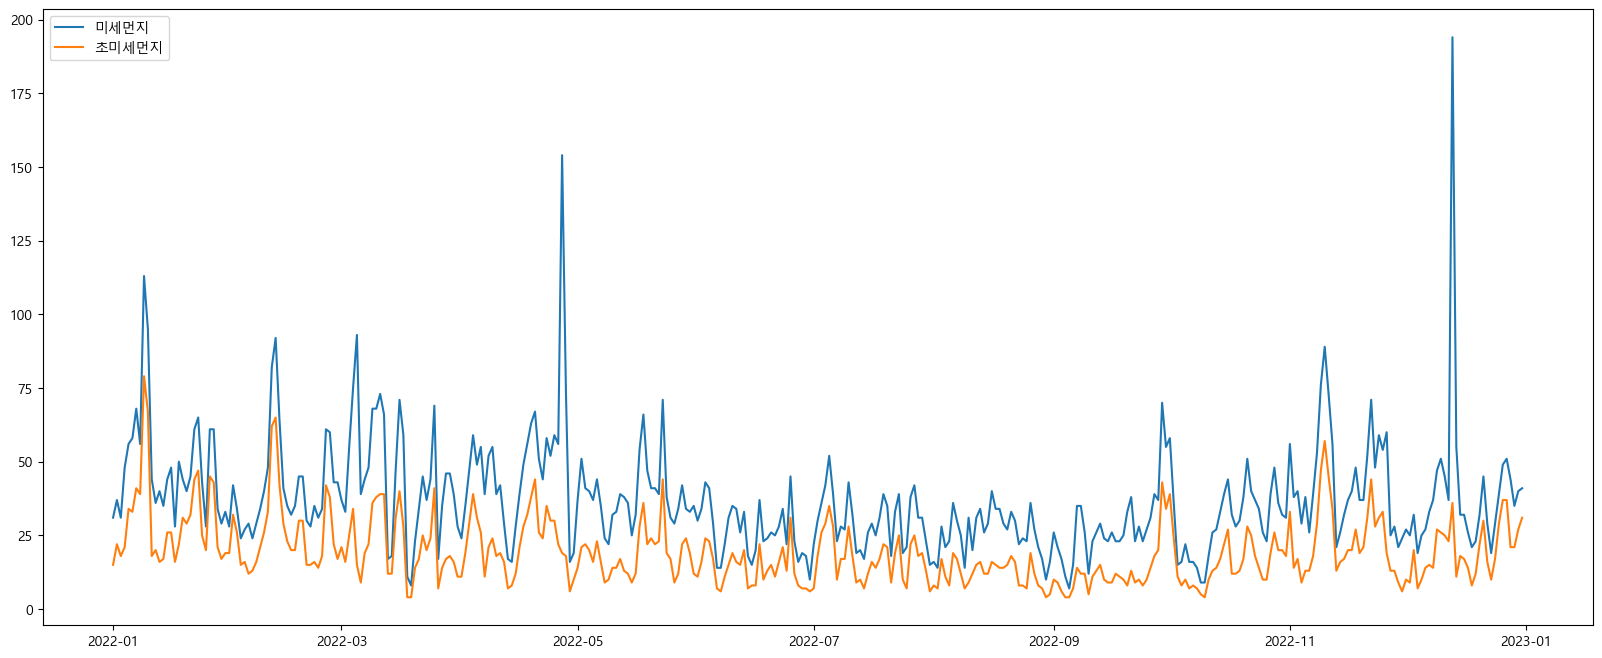

In [43]:
plt.figure(figsize=(20,8))
plt.plot(df_flt['측정일시'], df_flt['미세먼지농도(㎍/㎥)'], label='미세먼지')
plt.plot(df_flt['측정일시'], df_flt['초미세먼지농도(㎍/㎥)'], label='초미세먼지')
plt.legend(loc='upper left')

In [50]:
df_flt2 = df_flt[['측정일시','미세먼지농도(㎍/㎥)']]
df_flt2.columns = ['측정일시','미세먼지농도']
df_flt3 = df_flt2.set_index('측정일시')
df_flt3.head()

,미세먼지농도
측정일시,
2022-01-01,31.0
2022-01-02,37.0
2022-01-03,31.0
2022-01-04,48.0
2022-01-05,56.0


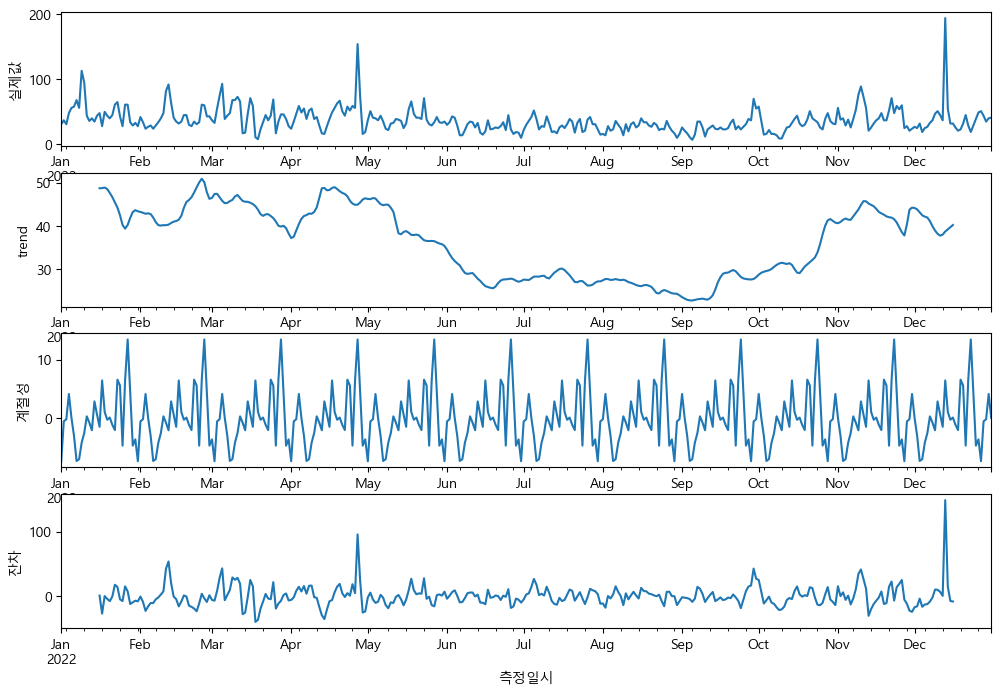

In [59]:
# trend 추세, 계절성, 실제값
result = seasonal_decompose(df_flt3['미세먼지농도'],
                           period=30, # 30일 단위로 계절성을 분석
                           model='additive' # 계절성, 추세, 잔차를 덧셈으로 분석
                           )
fig, axes = plt.subplots(4, 1, figsize=(12,8))
result.observed.plot(ax=axes[0])
axes[0].set_ylabel('실제값')
result.trend.plot(ax=axes[1])
axes[1].set_ylabel('trend')
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('계절성')
result.resid.plot(ax=axes[3])
axes[3].set_ylabel('잔차')
plt.show()

In [62]:
# facebook에서 개발한 시계열 예측 라이브러리 pip install prophet
from prophet import Prophet
df_flt2.columns = ['ds','y']
df_flt2.head()

,ds,y
44,2022-01-01,31.0
93,2022-01-02,37.0
143,2022-01-03,31.0
196,2022-01-04,48.0
244,2022-01-05,56.0


In [63]:
p = Prophet()
p.fit(df_flt2)

16:38:35 - cmdstanpy - INFO - Chain [1] start processing
16:38:35 - cmdstanpy - INFO - Chain [1] done processing


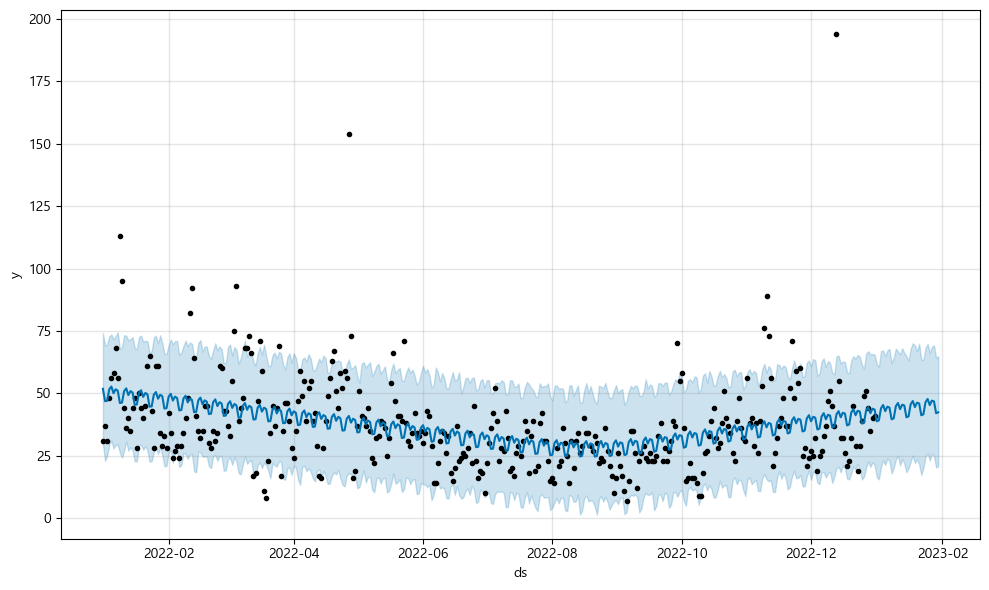

In [66]:
future = p.make_future_dataframe(periods=30) # 30일 이후의 데이터를 예측
forecast = p.predict(future)
f = p.plot(forecast)

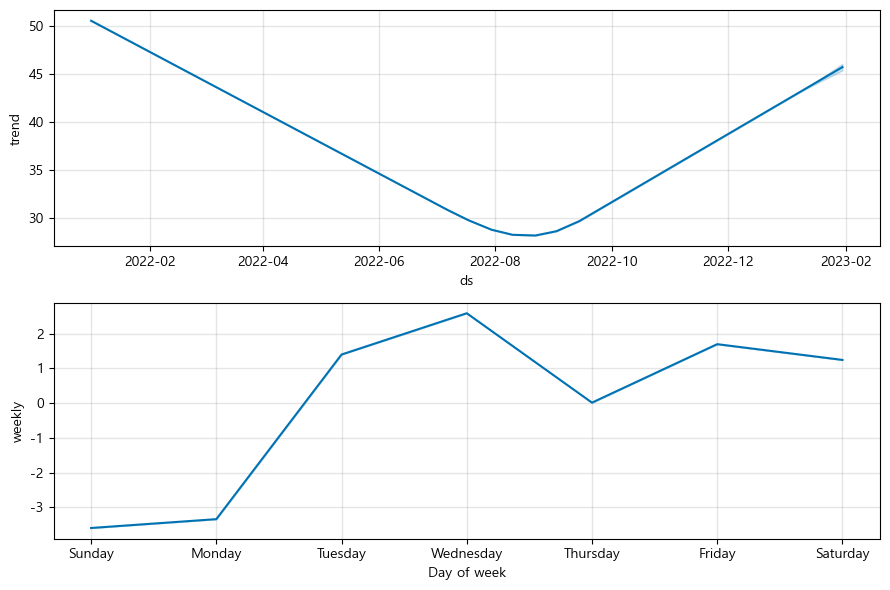

In [67]:
f2 = p.plot_components(forecast) # 트랜드와 휴일효과 그래프

In [68]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,50.526912,29.702575,74.208939,50.526912,50.526912,1.243531,1.243531,1.243531,1.243531,1.243531,1.243531,0.0,0.0,0.0,51.770443
1,2022-01-02,50.421588,22.871039,69.079448,50.421588,50.421588,-3.597541,-3.597541,-3.597541,-3.597541,-3.597541,-3.597541,0.0,0.0,0.0,46.824047
2,2022-01-03,50.316264,24.893758,69.646299,50.316264,50.316264,-3.343116,-3.343116,-3.343116,-3.343116,-3.343116,-3.343116,0.0,0.0,0.0,46.973148
3,2022-01-04,50.210940,29.389323,72.794086,50.210940,50.210940,1.399017,1.399017,1.399017,1.399017,1.399017,1.399017,0.0,0.0,0.0,51.609957
4,2022-01-05,50.105616,30.963707,73.567609,50.105616,50.105616,2.588193,2.588193,2.588193,2.588193,2.588193,2.588193,0.0,0.0,0.0,52.693810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2023-01-26,45.238005,23.038230,66.085157,44.957901,45.508636,0.012786,0.012786,0.012786,0.012786,0.012786,0.012786,0.0,0.0,0.0,45.250791
391,2023-01-27,45.354100,25.769022,68.662076,45.057706,45.644731,1.697130,1.697130,1.697130,1.697130,1.697130,1.697130,0.0,0.0,0.0,47.051230
392,2023-01-28,45.470194,24.967926,69.207816,45.163629,45.786993,1.243531,1.243531,1.243531,1.243531,1.243531,1.243531,0.0,0.0,0.0,46.713725
393,2023-01-29,45.586288,20.219166,64.111690,45.263798,45.920752,-3.597541,-3.597541,-3.597541,-3.597541,-3.597541,-3.597541,0.0,0.0,0.0,41.988748


In [70]:
forecast[['ds','yhat','yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
365,2023-01-01,38.738106,16.251659,61.693117
366,2023-01-02,39.108625,15.454029,60.624986
367,2023-01-03,43.966852,20.423680,66.907479
368,2023-01-04,45.272123,23.081166,67.147524
369,2023-01-05,42.812810,21.318460,64.808494
370,2023-01-06,44.613248,23.827714,67.184635
371,2023-01-07,44.275744,22.763846,67.755992
372,2023-01-08,39.550766,17.864905,62.009623
373,2023-01-09,39.921285,19.986703,64.272321
374,2023-01-10,44.779513,23.414629,67.864092


In [74]:
forecast.loc[forecast['ds']=='2023-01-15', ['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
379,2023-01-15,40.363427,18.339673,64.848986
